# Importing Libraries

In [1]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Dataset Link: https://www.kaggle.com/datasets/kritikseth/fruit-and-vegetable-image-recognition

# Test set Image Processing

In [3]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


# Loading Model

In [4]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

#Visualising and Performing Prediction on Single image

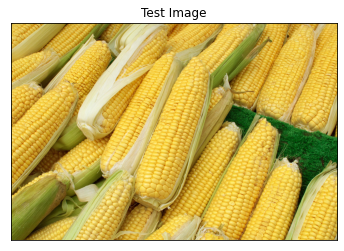

In [18]:
#Test Image Visualization
import cv2
image_path = '/content/drive/MyDrive/Fruit_Vegetable_Recognition/test/corn/Image_1.jpg'
# Reading an image in default mode
img = cv2.imread(image_path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) #Converting BGR to RGB
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

#Testing Model

In [19]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(64,64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 70ms/step


In [85]:
print(predictions)

[[1.89373935e-07 1.26680515e-08 8.41179643e-12 7.13847426e-10
  3.65349777e-08 3.41910056e-09 2.43847853e-09 3.40927375e-09
  1.15868648e-09 8.68253887e-01 7.02233202e-11 1.01623976e-09
  3.38974210e-10 1.97231609e-09 2.13303064e-08 2.36156539e-10
  8.81362112e-08 1.22481765e-07 1.81736987e-10 2.48688167e-07
  2.59926043e-12 2.34303138e-06 1.93918326e-10 8.87911789e-09
  1.65913738e-09 1.99370938e-08 2.29051578e-09 1.63376068e-09
  1.12872023e-08 2.54478350e-09 9.47055323e-10 1.31742939e-01
  1.30111907e-10 9.36889247e-11 1.05323084e-09 6.89230006e-08]]


(1, 36)

In [87]:
# test_set.class_names

In [88]:
result_index = np.argmax(predictions) #Return index of max element
print(result_index)

9


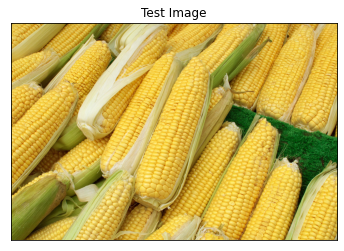

In [22]:
# Displaying the image 
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [23]:
#Single image Prediction
print("It's a {}".format(test_set.class_names[result_index]))

It's a corn
